We want to build an ODE solver that allows us to specify an IVP, and then outputs a table and graph of the DE.

 - $y_{n+1} = y_n + h*y'(x_n, y_n)$

Test Example:

 - $ y'(x) = y-x^2+1$

 - $y(0) = 0.5$

,n,x_n,y_n,y_p,y_n+1
0,0.0,0.500,0.000000,1.500000,0.507500
1,1.0,0.505,0.507500,1.252475,0.513762
2,2.0,0.510,0.513762,1.253662,0.520031
3,3.0,0.515,0.520031,1.254806,0.526305
4,4.0,0.520,0.526305,1.255905,0.532584
...,...,...,...,...,...
995,995.0,5.475,-208.796125,-237.771750,-209.984984
996,996.0,5.480,-209.984984,-239.015384,-211.180061
997,997.0,5.485,-211.180061,-240.265286,-212.381387
998,998.0,5.490,-212.381387,-241.521487,-213.588995


Text(0.5, 1.0, 'ODE Plot, Granularity = 0.005')

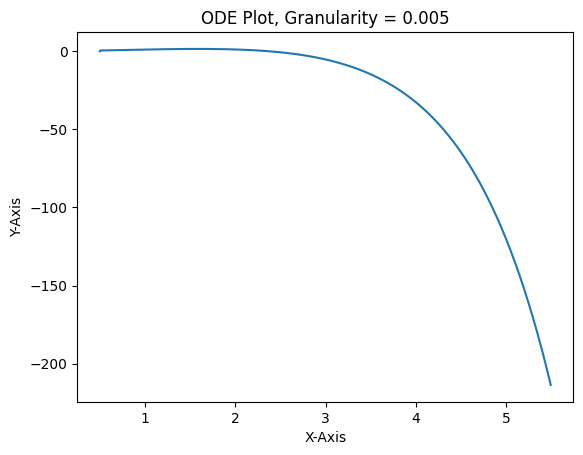

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#initial values
x0 = 0
y0 = 0.5
n = 1000 #granularity
lastX = 5 #ending x value

# get y prime evaluated at x and y - THIS IS WHERE YOU PUT THE DE
def YP(x,y):
    return float(y-x**2+1)

# get the next y value based on current x and y
def new_y(x,y,h):
    return y + h*YP(x,y)

# initialize dataframe
cols = ['n', 'x_n', 'y_n', 'y_p', 'y_n+1']
ode = pd.DataFrame(columns=cols)
ode.loc[0] = [0, y0, x0, YP(x0,y0), new_y(x0,y0,h)]

# get n for intended last y value

def get_h(granularity, endval, startval):
    return (-endval+startval)/granularity

#define dx
h = get_h(n,x0,lastX)

#fill out the table
for i in range(1,n):
    ode.loc[i,'n'] = i
    ode.loc[i,'x_n'] = ode.loc[i-1,'x_n'] + h
    ode.loc[i,'y_n'] = ode.loc[i-1,'y_n+1']
    ode.loc[i,'y_p'] = YP(ode.loc[i,'x_n'],ode.loc[i,'y_n'])
    ode.loc[i,'y_n+1'] = new_y(ode.loc[i,'x_n'],ode.loc[i,'y_n'], h)

#display the table
display(ode)

#plot the figure
plt.figure
plt.plot(ode['x_n'],ode['y_n'])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title(f'ODE Plot, Granularity = {h}')